## DCNN for ‘Machine RUL Prediction using Time-series Data’

This example shows how to predict the remaining useful life (RUL) of engines by using deep convolutional neural networks (DCNNs). The advantage of a deep learning approach is that you do not need manual feature extraction or feature selection for your model to predict RUL. Furthermore,you do not need prior knowledge of machine health prognostics or signal processing to develop a deep learning based RUL prediction model.

The aim of this project is to develop and discuss methodologies and algorithms to monitor the health status and carry out predictive maintenance on commercial aircraft engines based only on the information gathered by the sensors installed inside the engine.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from main import TURBO

In [2]:
Turbo = TURBO()
Turbo.train.head()


,unit_no,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


### Plot data

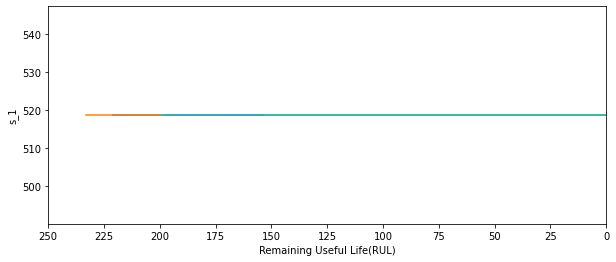

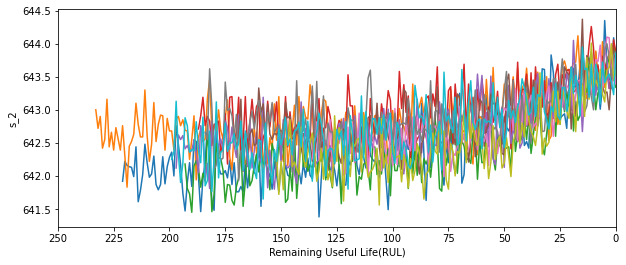

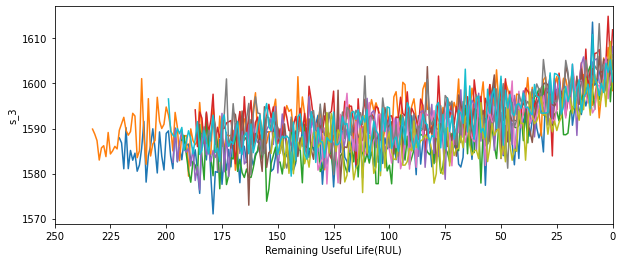

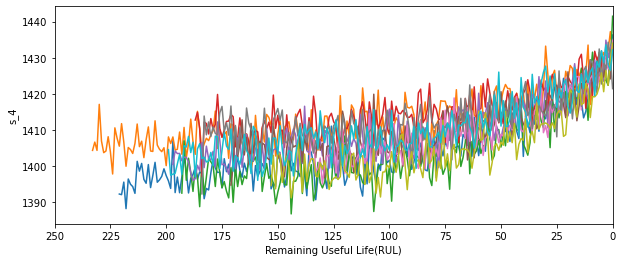

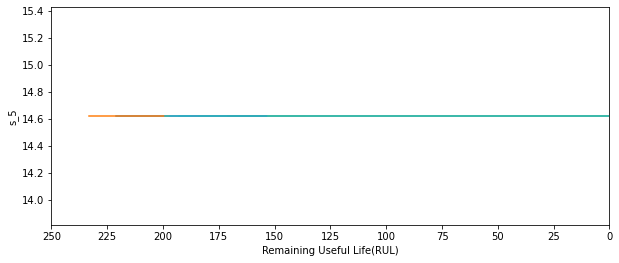

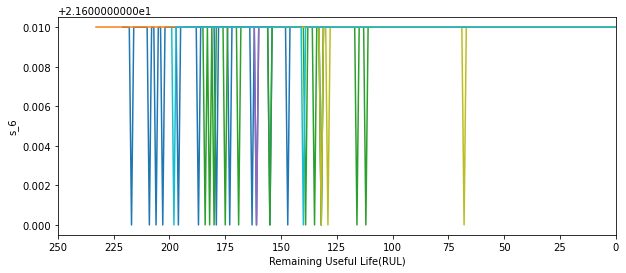

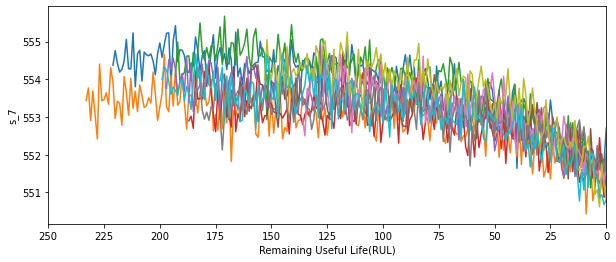

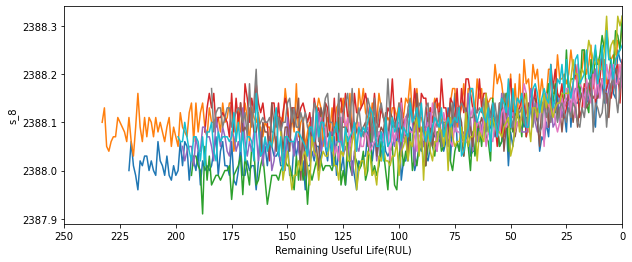

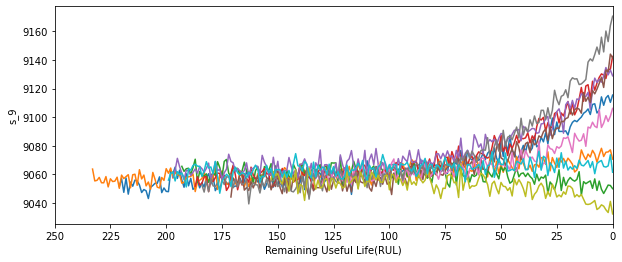

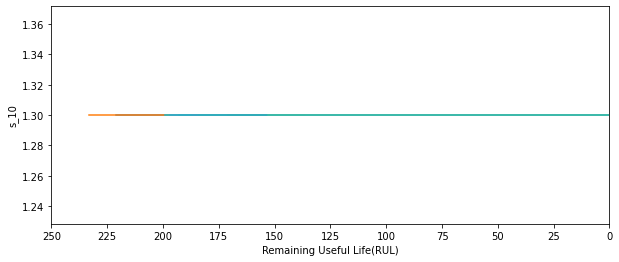

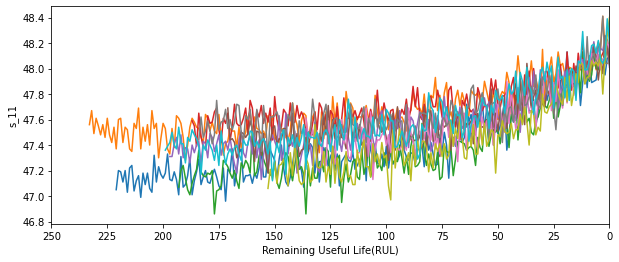

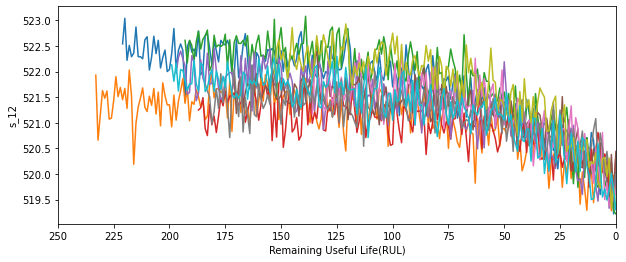

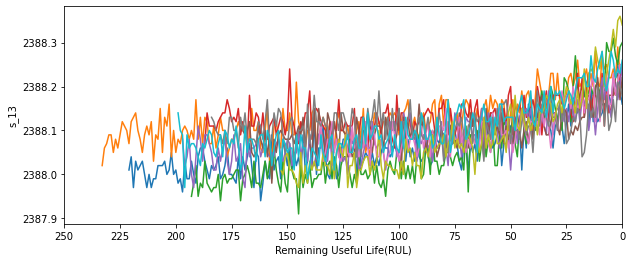

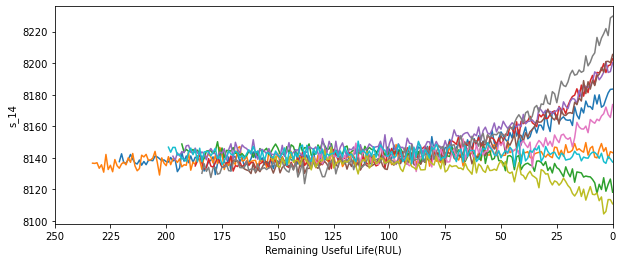

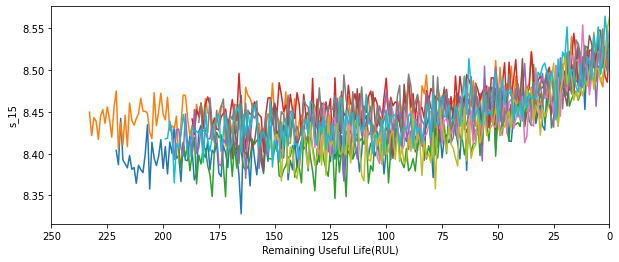

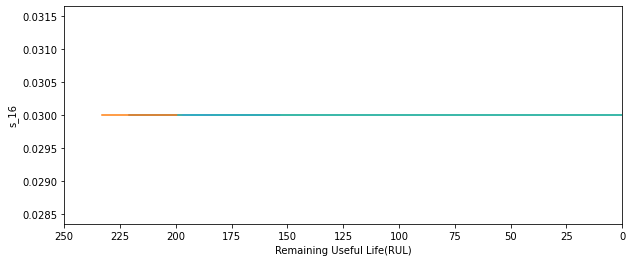

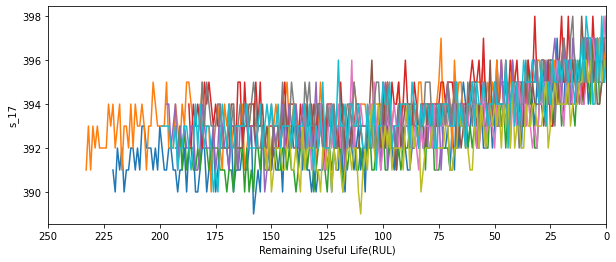

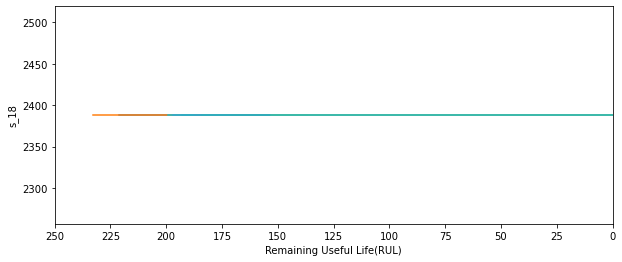

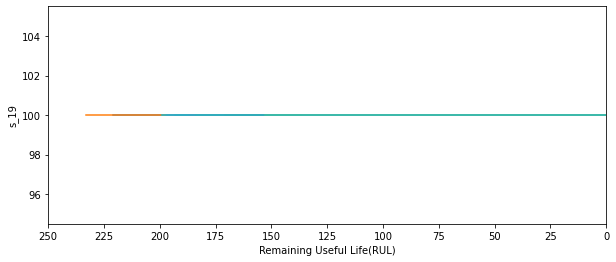

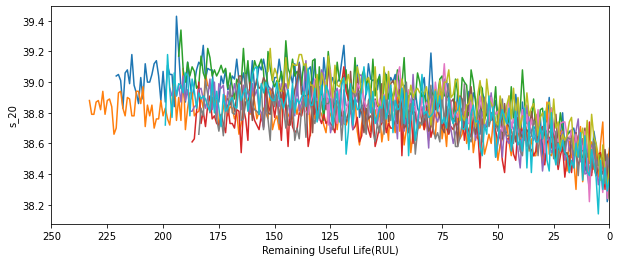

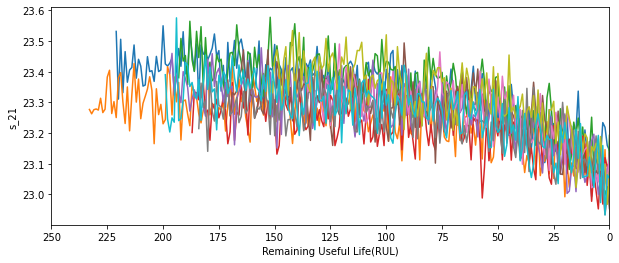

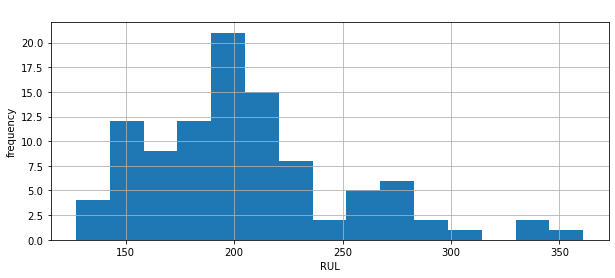

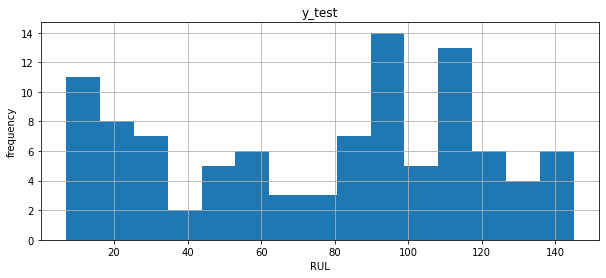

In [3]:
Turbo.plot()

### Build reference model

In [4]:

# build and train regression model using snapML for reference
Turbo.model_GLM()


train set RMSE:27.97400600459463, R2:0.5493843399746834
test set RMSE:25.649704142029428, R2:0.6190173695954566


### Preprocess Training Data

- **Remove Features with Less Variability:** Features that remain constant for all time steps can negatively impact the training. Discard these features.
  
- **Normalize Training Predictors**
  
- **Clip Responses:** The response data represents the RUL value over life for each engine and is based individual engine lifetime. The sequence assumes a linear degradation from the time of the initial measurement to the time of engine failure. In order for network to focus on the part of the data where engines are more likely to fail (end of the engine's life), clip the responses at the threshold of 125. Clipping the responses causes the network to treat instances with higher RUL values as equal.

- **Exponential Smoothening**
  
- **Condition specific scaling**
  
- **Generate train and test dataframe**

In [5]:
Turbo.prepare_data_DCNN() # prepare data for DCNN


In [6]:
Turbo.train_array.shape

(18731, 20, 14)

### Model training

2022-09-30 16:34:51.428150: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
471/471 [==============================] - 5s 7ms/step - loss: 1114.6741 - MAE: 24.1602 - val_loss: 724.2048 - val_MAE: 21.1217
Epoch 2/30
471/471 [==============================] - 4s 9ms/step - loss: 809.9981 - MAE: 21.0763 - val_loss: 719.0654 - val_MAE: 20.9238
Epoch 3/30
471/471 [==============================] - 4s 9ms/step - loss: 779.7660 - MAE: 20.6297 - val_loss: 531.0606 - val_MAE: 17.8640
Epoch 4/30
471/471 [==============================] - 5s 10ms/step - loss: 740.8745 - MAE: 20.1137 - val_loss: 467.1402 - val_MAE: 16.2939
Epoch 5/30
471/471 [==============================] - 5s 10ms/step - loss: 689.2369 - MAE: 19.2948 - val_loss: 580.2752 - val_MAE: 18.5167
Epoch 6/30
471/471 [==============================] - 5s 10ms/step - loss: 665.1786 - MAE: 18.9587 - val_loss: 365.7712 - val_MAE: 13.9704
Epoch 7/30
471/471 [==============================] - 5s 11ms/step - loss: 633.4752 - MAE: 18.3751 - val_loss: 377.0264 - val_MAE: 14.4650
Epoch 8/30
471/471 [=========

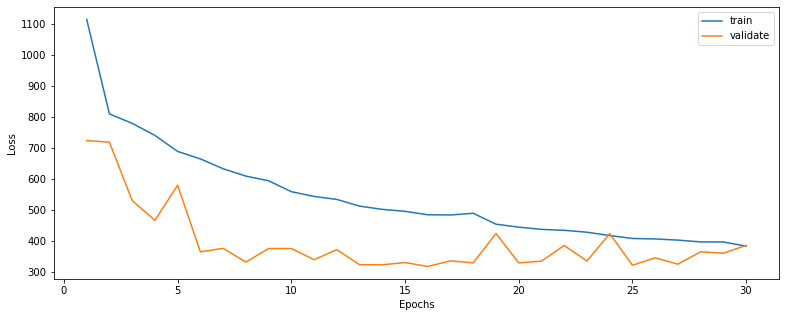

In [7]:
Turbo.build_train_model(plot=True, epochs=30)

### Model summary

In [8]:
Turbo.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 14)]          0         
                                                                 
 Conv0_Block0 (Conv1D)       (None, 20, 32)            1376      
                                                                 
 BN0_Block0 (BatchNormalizat  (None, 20, 32)           128       
 ion)                                                            
                                                                 
 A0_Block0 (Activation)      (None, 20, 32)            0         
                                                                 
 Conv1_Block0 (Conv1D)       (None, 20, 32)            3104      
                                                                 
 BN1_Block0 (BatchNormalizat  (None, 20, 32)           128       
 ion)                                                        

### Model Evaluation

In [9]:
Turbo.model_eval()

train set RMSE:13.764595031738281, R2:0.891792781543464
test set RMSE:18.362434043505093, R2:0.8047455441904386
